![Colegio Bourbaki](./Images/Bourbaki.png)

## ESG indicators missing value estimation
by Pladifes (https://challengedata.ens.fr/challenges/87)

**Contexto del reto**

A medida que aumenta el número de inversores y de personas dispuestas a comprometerse con las preocupaciones medioambientales y sociales, las características extrafinancieras de las empresas (también denominadas ESG por Environment, Social and Governance) cobran cada vez más importancia.

Impactfull es una empresa que ofrece asesoramiento sobre finanzas sostenibles y datos extrafinancieros basados en datos brutos verificados procedentes de las empresas. Sus datos se componen de más de 30 indicadores (dentro de las categorías medioambiental, social y de gobernanza) y se extraen de los informes de sostenibilidad.

Pladifes es un proyecto de investigación alojado en el Institut Louis Bachelier, una asociación sin ánimo de lucro que promueve la investigación en economía y finanzas. Se trata de un EquipEx+ (código: ANR-21-ESRE-0036), financiado por la ANR y destinado a facilitar el acceso a datos extrafinancieros con fines de investigación.

Este reto es el resultado de una colaboración entre las dos partes mencionadas, como una oportunidad para ambas de ganar visibilidad y permitir a los estudiantes trabajar con (esperemos) interesantes datos financieros adicionales.

El equipo de Pladifes también tiene previsto incluir la mejor propuesta del reto en su base de datos, lo que permitirá a los investigadores utilizarla para proyectos académicos.


**Objetivos del reto**

El objetivo del reto es predecir los valores que faltan para 15 indicadores extrafinancieros corporativos (hasta un 96% de valores perdidos). Estos indicadores están disponibles durante tres años (2018, 2019, 2020) y provienen de divulgaciones de sostenibilidad.

En ambos conjuntos de entrada (X_train y X_test), algunos de los valores perdidos se añaden artificialmente en comparación con los de salida (y_train, y_test). Estos valores adicionales se utilizan para calcular el rendimiento del modelo comparando los valores imputados con los valores ocultos reales. Por lo demás, los archivos de entrada y salida tienen exactamente el mismo número de filas y columnas.

El objetivo es, por tanto, entrenar un modelo de imputación de valores perdidos en los datos de entrenamiento y utilizarlo en los datos de prueba para rellenar los huecos.

**Descripción de los datos**

Los datos de entrada contienen 15 indicadores financieros adicionales sobre 10 000 empresas durante un máximo de tres años (2018, 2019, 2020).

Cada línea está definida por un "ID" único y corresponde a una empresa determinada (definida por "company_id") y a un año determinado (definido por "year"). Los datos se han seleccionado de forma que no haya más de un 96% de valores perdidos para un indicador determinado. Las empresas son anónimas y se dividen en un conjunto de entrenamiento y otro de prueba, de modo que una empresa determinada sólo puede encontrarse en el conjunto de entrenamiento o en el de prueba.

La primera línea del archivo de entrada contiene la cabecera, y las columnas están separadas por comas. El tamaño total es inferior a 10Mo.

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores perdidos adicionales.

El número de valores enmascarados por columna es de al menos 100, como máximo el 15% de los valores no ausentes disponibles (tanto para X_train como para X_test).

| Column Name                           | Description                                               | Missing Value (%) |
| ------------------------------------- | --------------------------------------------------------- | ----------------- |
| anonimized_id                         | The index (unique)                                       | 0%                |
| company_id                            | The company id (unique)                                   | 0%                |
| year                                  | The year (2018, 2019, 2020)                               | 0%                |
| region                                | The region (5 options)                                    | 0%                |
| headquarters_country                  | The headquarter country (99 options)                     | 0%                |
| industry                              | The primary industry sector (153 options)                | 0%                |
| market cap                            | The "size of the company" (stock value x number of stocks, in $) | 0%                |
| employees                             | The number of employees of the company                    | 16%               |
| revenue                               | The annual revenue of the company (in $)                 | 2%                |
| scope_1                               | The scope 1 (direct) GHG emission of the company (in T/CO2e) | 66%               |
| scope_2                               | The scope 2 (indirect, owned) GHG emission of the company (in T/CO2e) | 66%               |
| scope_3                               | The scope 3 (indirect, not owned) GHG emission of the company (in T/CO2e) | 69%               |
| waste_production                      | The annual amount of waste produced (in T)               | 84%               |
| waste_recycling                       | The annual amount of waste recycled (in T)               | 89%               |
| water_consumption                     | The annual amount of water consumed (in T)              | 72%               |
| water_withdrawal                      | The annual amount of water withdrawn (in T)             | 74%               |
| energy_consumption                    | The annual energy consumption (in KWH)                   | 82%               |
| hours_of_training                     | The number of hours of training for all employees for one year (in H) | 87%               |
| gender_pay_gap                        | Mean men's annual earnings above women's annual earnings (in %) | 96%               |
| independant_board_members_percentage  | The percentage of independent members in the board of the company (in %) | 75%               |
| legal_costs_paid for_controversies     | The annual amount of the legal costs paid for controversies (in $) | 59%               |
| ceo_compensation                      | The annual CEO compensation (in $)                       | 92%               |


## Introducción a Missing Values 

La falta de datos es un problema común que aparece en contextos reales y puede comprometer
el rendimiento de la mayoría de los modelos de aprendizaje (Abreu et al., 2014a,b)

En la comunidad se reconocen tres mecanismos de ausencia de datos: (Baraldi and Enders, 2010; Rubin, 1976; Little and Rubin, 2019):

* Missing Completely At Random (MCAR): se produce cuando el mecanismo de la
omisión no está relacionado con ningún valor observado o no observado del conjunto de datos;

* Missing At Random (MAR): se produce cuando la causa de los datos que faltan está relacionada
con los valores observados del conjunto de datos;

* Missing Not At Random (MNAR): se produce cuando la probabilidad de que falte un valor
falta está relacionada con ese mismo valor y/o con otros datos desconocidos

![Missing Values](./Images/MissingValues.png)

## Librerias

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import missingno as msno  # Handling missing values viz

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preproccesing
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error

# Autoencoder Architecture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Utils
import os
import sys
from scipy.stats import zscore
from torchsummary import summary  # Display model summary
from tqdm.notebook import tqdm  # Display progress bar

## Configuraciones

### Valores Semilla

In [2]:
# Set seed for random generators
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

### GPU Management

In [3]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:16'
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [5]:
device

'cuda:0'

In [6]:
print("__Python VERSION:", sys.version)
print("__pyTorch VERSION:", torch.__version__, end="\n\n")

if torch.cuda.is_available():
    print("__CUDA VERSION")
    #! nvcc --version
    print("__CUDNN VERSION:", torch.backends.cudnn.version())
    print("__Number CUDA Devices:", torch.cuda.device_count())
    print("__Devices:")
    print("Active CUDA Device: GPU", torch.cuda.current_device())
    print("Available devices ", torch.cuda.device_count())
    print("Current cuda device ", torch.cuda.current_device())
    ! nvidia-smi

__Python VERSION: 3.11.7 (main, Dec 29 2023, 12:40:11) [GCC 11.4.0]
__pyTorch VERSION: 2.1.2+cu121

__CUDA VERSION
/bin/bash: line 1: nvcc: command not found
__CUDNN VERSION: 8904
__Number CUDA Devices: 1
__Devices:
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
Wed Jan 10 21:42:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.10              Driver Version: 535.86.10    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti     On  | 00000000

### Display

In [7]:
# Set the display format to avoid exponential notation
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Funciones de ayuda

In [8]:
def correlation(dataframe, plot=True, matrix=False):
    """Devuelve la matriz de correlación de un dataframe,
    si plot=True, muestra un mapa de calor de la matriz de correlación,
    si matrix=True, devuelve la matriz de correlación"""

    corr = dataframe.corr(method="spearman")

    if plot:
        fig, ax = plt.subplots(figsize=(25, 20))
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
        cmap = sns.color_palette("coolwarm", as_cmap=True)
        sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)

    if matrix:
        return corr

In [9]:
def normalized_mrse(y_true, y_pred):
    """Calcula el error cuadrático medio normalizado"""
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    range_y = np.max(y_true) - np.min(y_true)
    nrmse = rmse / range_y
    return nrmse

## Importación de datos

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores faltantes adicionales.

El archivo y_train actua de alguna manera de etiqueta frente al archivo X_train, ya que este tiene valores faltantes adicionales.

Usaremos el archivo x_train sin valores faltantes para entrenar el modelo, mientras que el archivo y_train hará de validador. X_test sera el testing, mientras que y_test será la respuesta al challenge.

In [10]:
df_x_train = pd.read_csv("./Data/x_train.csv")
df_y_train = pd.read_csv("./Data/y_train.csv")

## Análisis Exploratorio

In [11]:
df_x_train.head()

,Unnamed: 0,anonimized_id,company_id,year,region,headquarters_country,industry,market_cap,employees,revenue,...,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
0,0,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2020,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2020,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,NaN,241518.300,...,45705.800,28939.820,4875000.000,4875000.000,3019170.000,NaN,NaN,0.009,0.000,14769259.000
1,1,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2019,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2019,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,NaN,NaN,...,58395.940,32806.410,4890151.520,4992424.240,2889680.000,NaN,NaN,0.009,1.850,11555466.000
2,2,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2018,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2018,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,132000.000,NaN,...,52849.837,NaN,4765151.515,4924242.424,2676460.000,NaN,NaN,0.009,NaN,15682219.000
3,3,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2020,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2020,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,66800.000,202736.820,...,NaN,NaN,36150000.000,36150000.000,NaN,NaN,NaN,NaN,0.000,NaN
4,4,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2019,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2019,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,79000.000,290853.120,...,NaN,NaN,NaN,NaN,121216000.010,NaN,NaN,0.455,NaN,NaN


In [12]:
df_x_train = df_x_train.drop(columns=["Unnamed: 0"])

In [13]:
df_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   anonimized_id                         15000 non-null  object 
 1   company_id                            15000 non-null  object 
 2   year                                  15000 non-null  int64  
 3   region                                15000 non-null  object 
 4   headquarters_country                  15000 non-null  object 
 5   industry                              15000 non-null  object 
 6   market_cap                            15000 non-null  float64
 7   employees                             10614 non-null  float64
 8   revenue                               12498 non-null  float64
 9   scope_1                               4275 non-null   float64
 10  scope_2                               4260 non-null   float64
 11  scope_3        

In [14]:
print("Numero de valores NaN por columna:")
df_x_train.isna().sum()

Numero de valores NaN por columna:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                4386
revenue                                  2502
scope_1                                 10725
scope_2                                 10740
scope_3                                 11100
waste_production                        13082
waste_recycling                         13690
water_consumption                       11399
water_withdrawal                        11634
energy_consumption                      12730
hours_of_training                       13410
gender_pay_gap                          14457
independent_board_members_percentage    11826
legal_costs_paid_for_controversies       9808
ceo_compensation                  

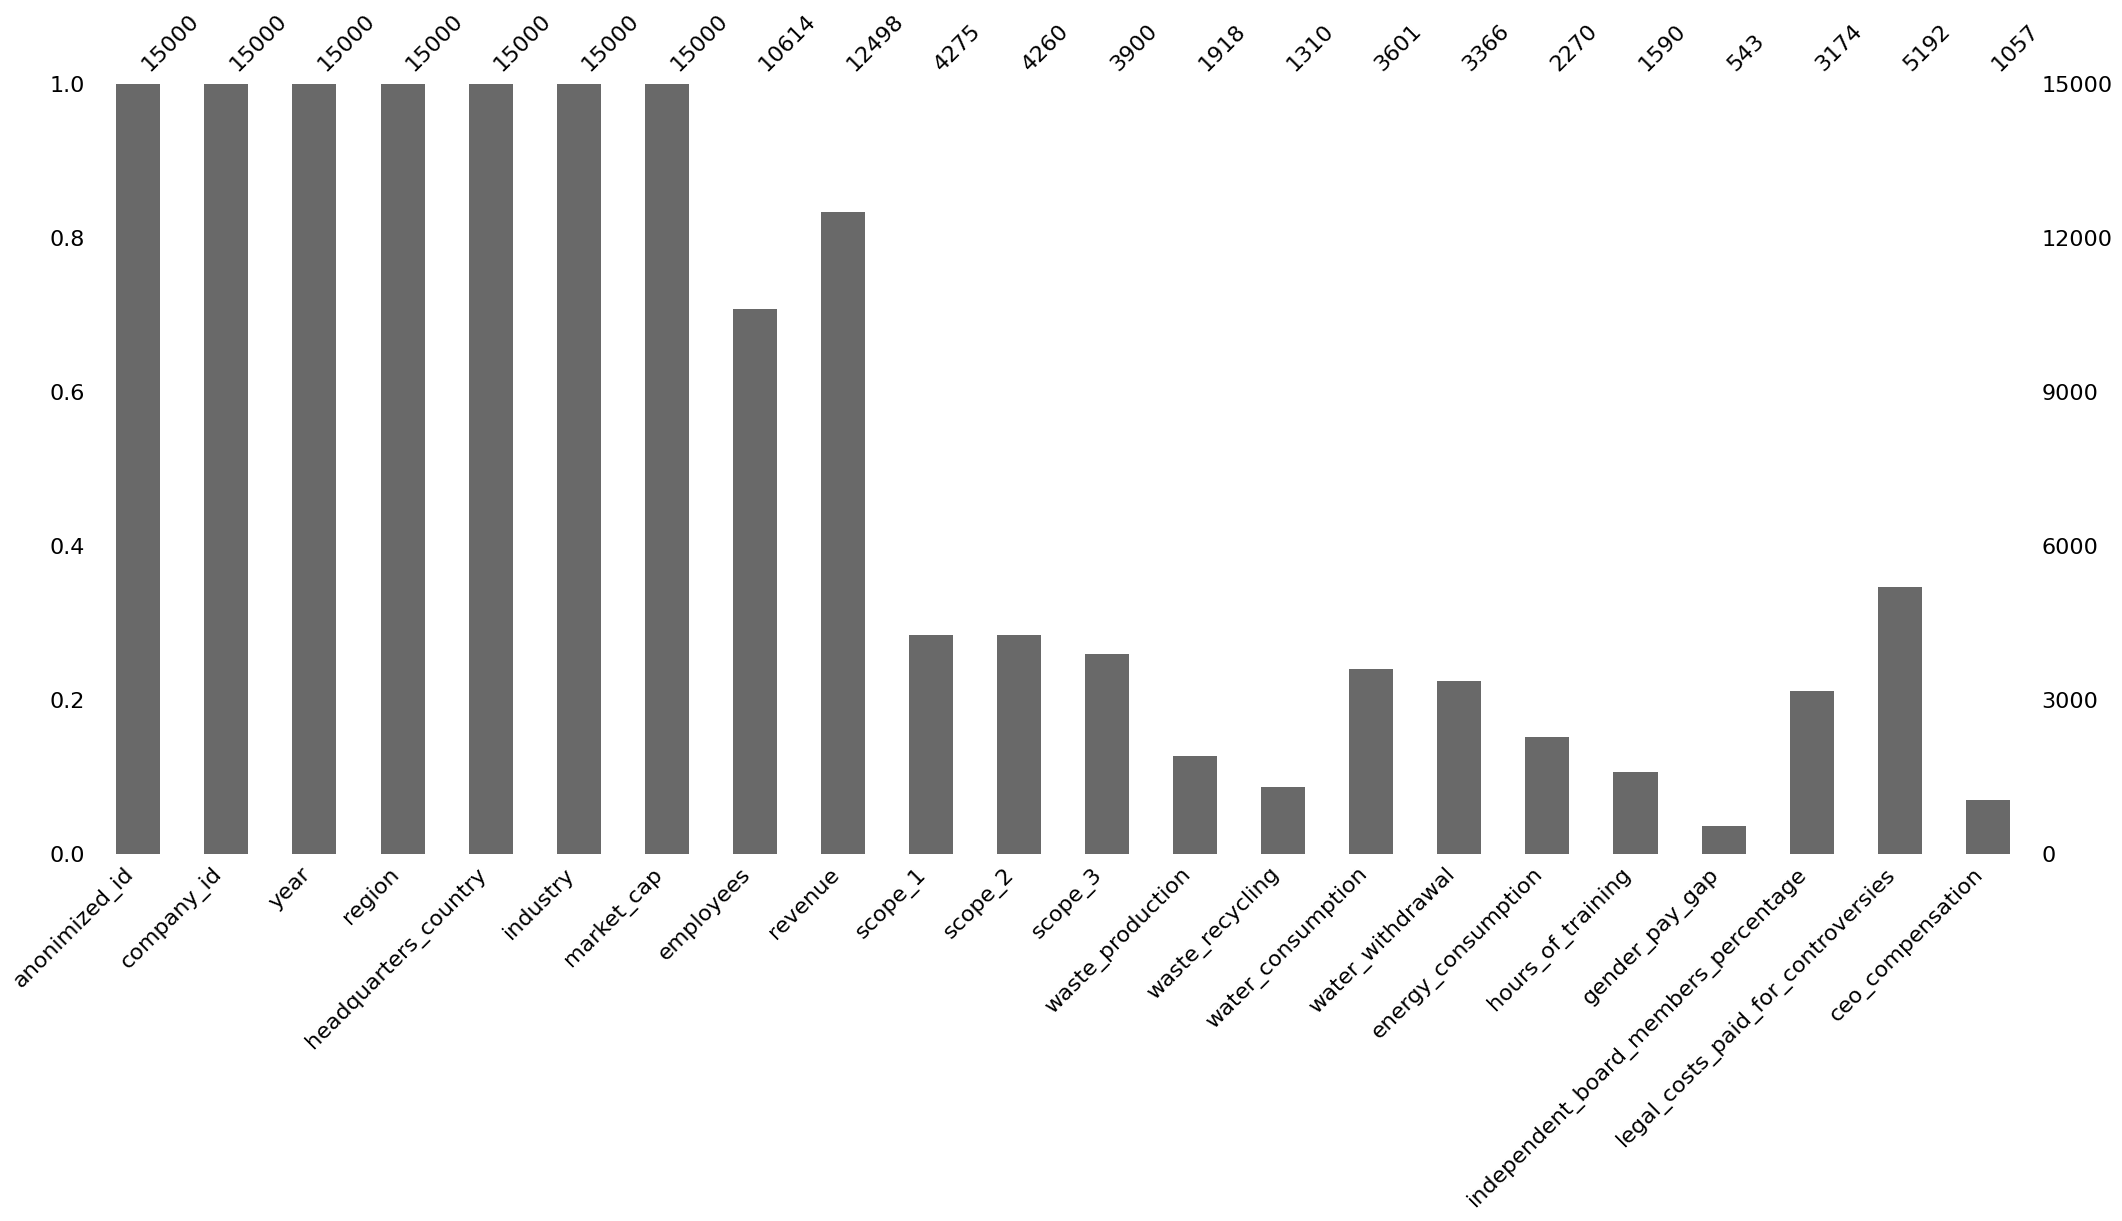

In [15]:
msno.bar(df_x_train)
plt.show()

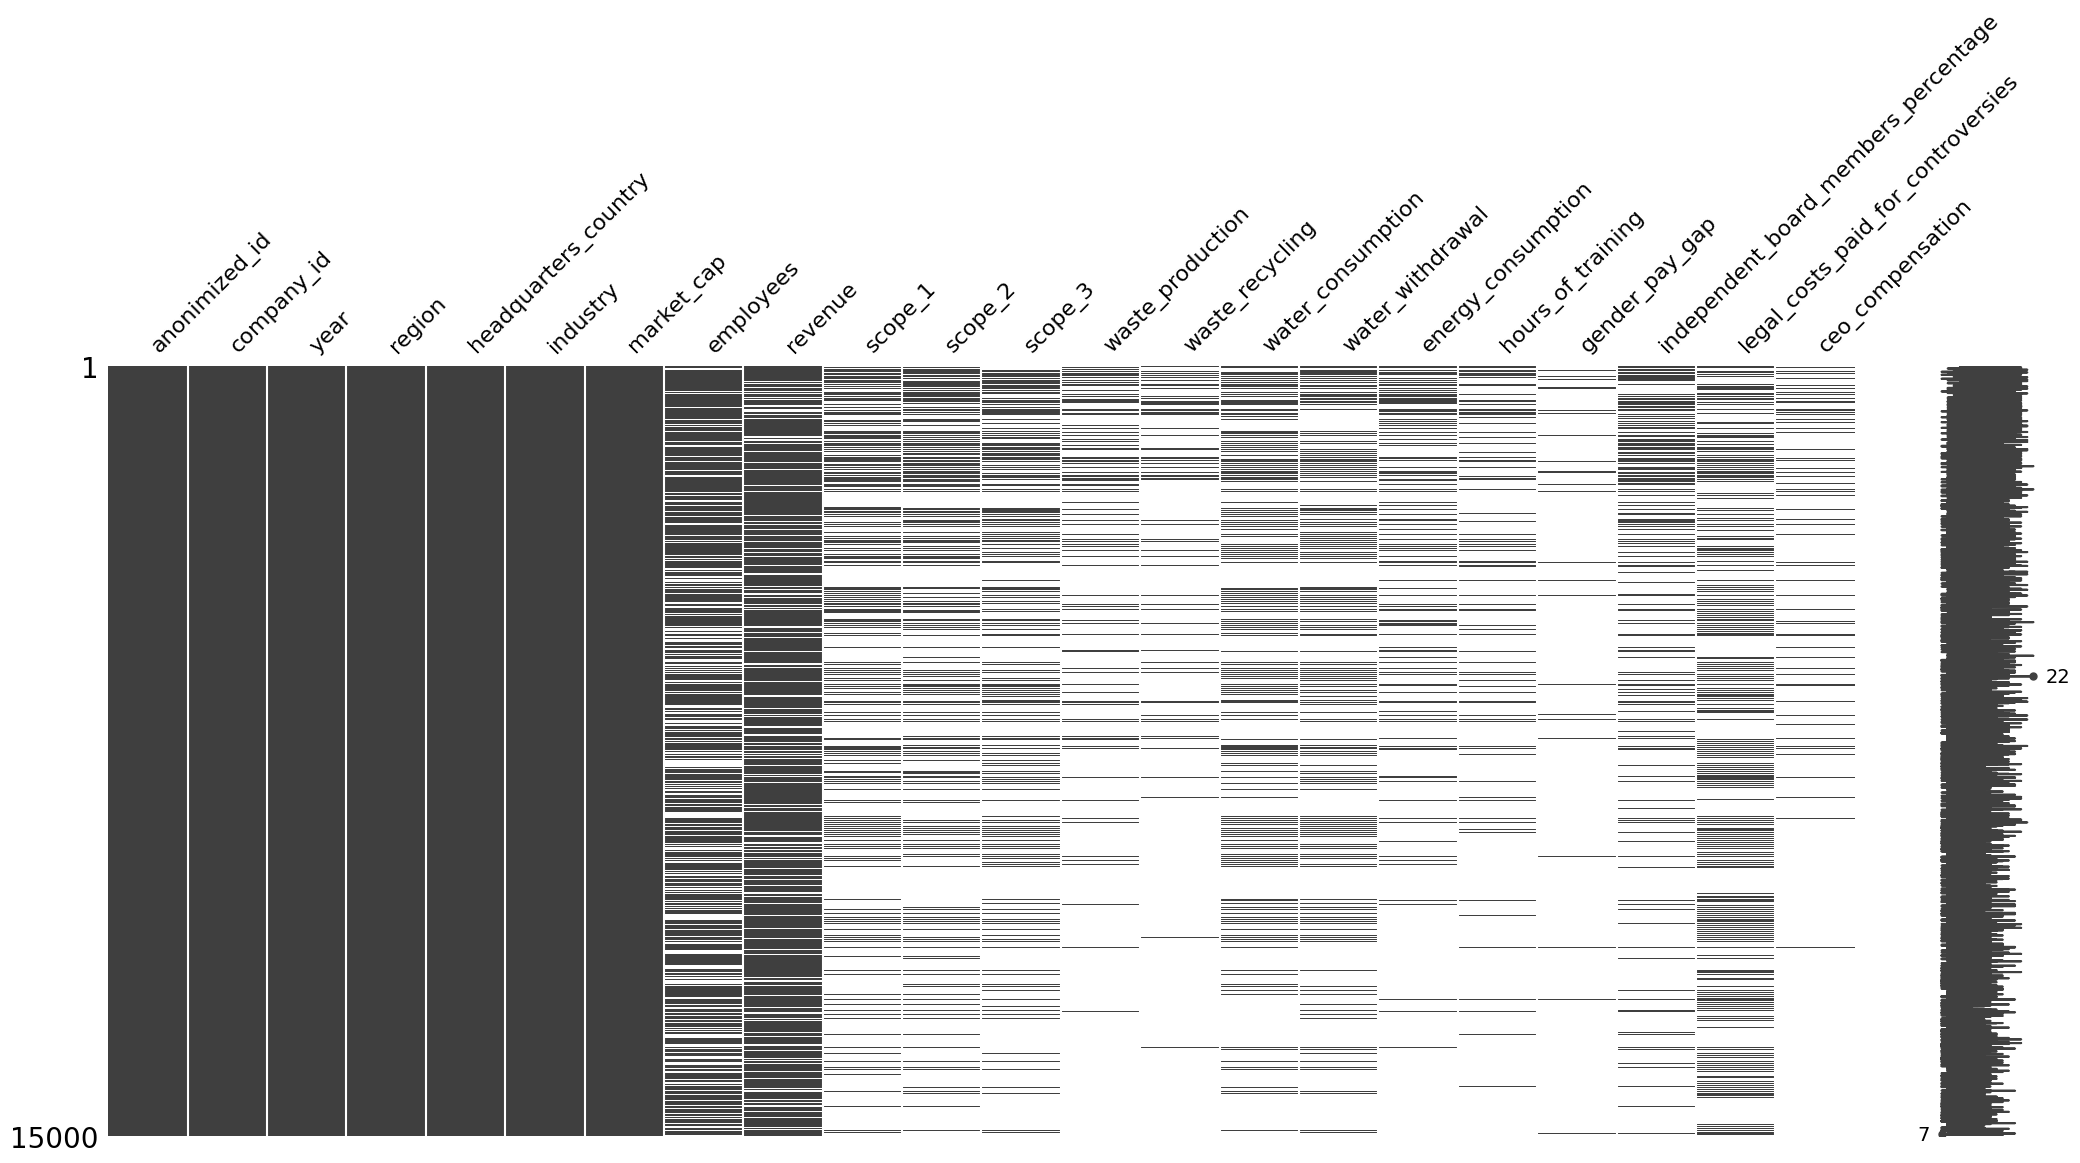

In [16]:
msno.matrix(df_x_train)
plt.show()

In [17]:
print(
    f"El número total de valores NaN es en el archivo x_train {df_x_train.isna().sum().sum()}"
)

El número total de valores NaN es en el archivo x_train 165432


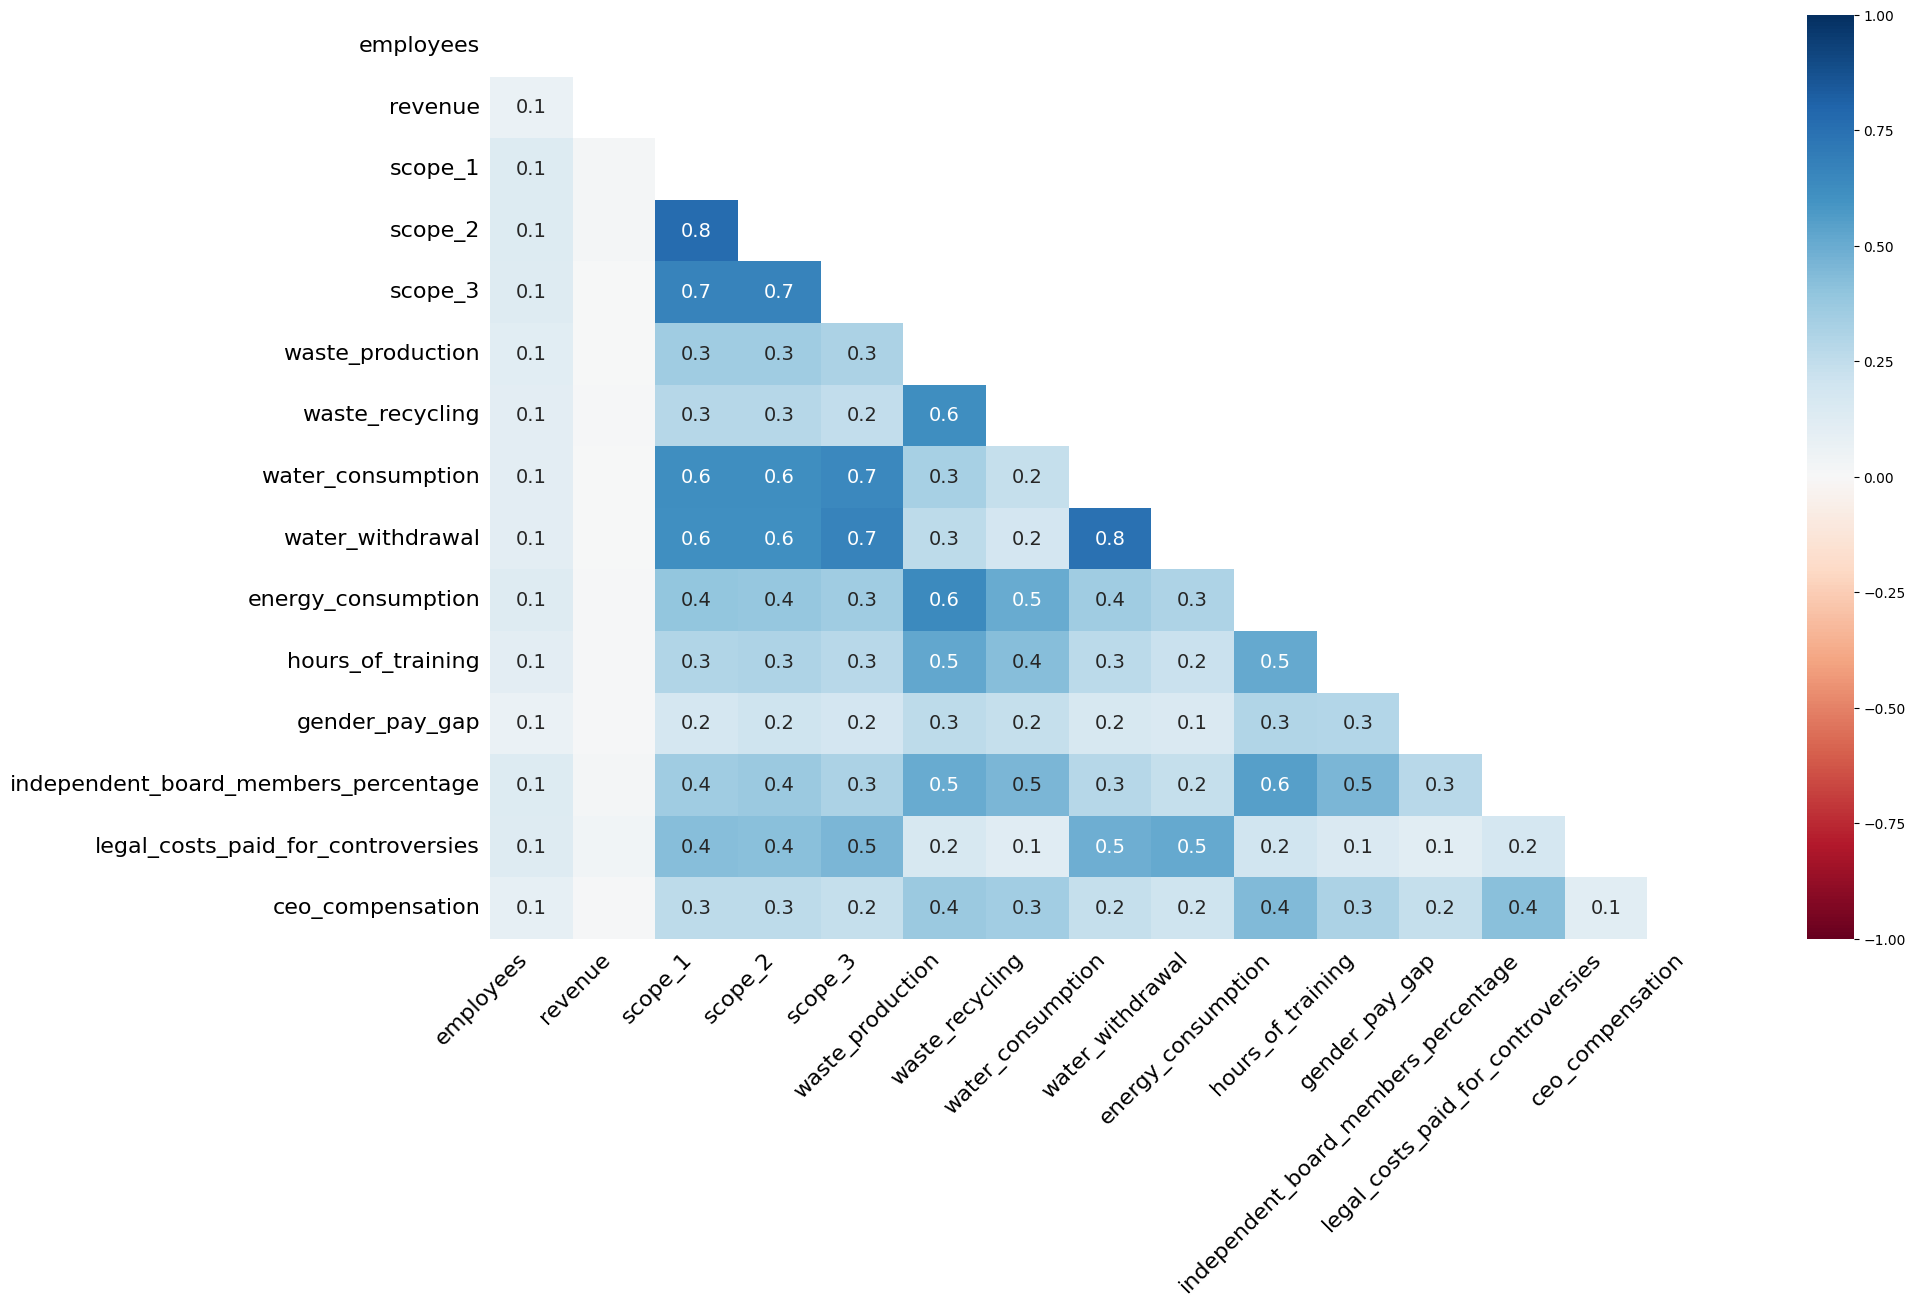

In [18]:
msno.heatmap(df_x_train)
plt.show()

La correlación de nulidad oscila entre -1 (si una variable aparece la otra definitivamente no) y 0 (las variables que aparecen o no aparecen no tienen ningún efecto entre sí) y 1 (si una variable aparece la otra definitivamente también).

Las variables que están siempre llenas o siempre vacías no tienen una correlación significativa, por lo que se eliminan silenciosamente de la visualización.

Las entradas marcadas con <1 o >-1 tienen una correlación que está cerca de ser exactamente negativa o positiva, pero que todavía no es perfecta. Esto apunta a un pequeño número de registros erróneos en el conjunto de datos. Podemos chequear, entonces, qué casos requerirán una atención especial.

El mapa de calor funciona muy bien para detectar relaciones de integridad de datos entre pares de variables, pero su poder explicativo es limitado cuando se trata de relaciones más amplias y no es especialmente adecuado para conjuntos de datos extremadamente grandes.

In [19]:
df_y_train = df_y_train.drop(columns=["Unnamed: 0"])

In [20]:
print("Numero de valores NaN por columna del archivo y_train:")
df_y_train.isna().sum()

Numero de valores NaN por columna del archivo y_train:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                2513
revenue                                   297
scope_1                                  9971
scope_2                                  9989
scope_3                                 10412
waste_production                        12744
waste_recycling                         13459
water_consumption                       10764
water_withdrawal                        11040
energy_consumption                      12330
hours_of_training                       13130
gender_pay_gap                          14357
independent_board_members_percentage    11266
legal_costs_paid_for_controversies       8892
ceo_compensation                  

In [21]:
print(
    f"El número total de valores NaN en el archivo y_train es: {df_y_train.isna().sum().sum()}"
)

El número total de valores NaN en el archivo y_train es: 154921


In [22]:
print(
    f"La diferencia de valores NaN entre el archivo x_train y y_train es: {df_x_train.isna().sum().sum() - df_y_train.isna().sum().sum()}"
)

La diferencia de valores NaN entre el archivo x_train y y_train es: 10511


### Estadística Descriptiva

In [23]:
columns = df_x_train.columns[7:]  # Columnas continuas (float64) de interés

In [24]:
columns

Index(['employees', 'revenue', 'scope_1', 'scope_2', 'scope_3',
       'waste_production', 'waste_recycling', 'water_consumption',
       'water_withdrawal', 'energy_consumption', 'hours_of_training',
       'gender_pay_gap', 'independent_board_members_percentage',
       'legal_costs_paid_for_controversies', 'ceo_compensation'],
      dtype='object')

In [25]:
df_x_train[columns].describe()

,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
count,10614.000,12498.000,4275.000,4260.000,3900.000,1918.000,1310.000,3601.000,3366.000,2270.000,1590.000,543.000,3174.000,5192.000,1057.000
mean,16116.073,4434.134,1745187.670,553135.019,16397506.571,6324003.236,165864.246,30852323.497,164157509.662,58650429.291,1082182.500,2.793,0.596,38.822,7411697.732
std,42258.719,15362.161,13067155.441,8772001.317,388112665.448,79141062.578,980263.937,972599884.395,2557727845.886,1748249152.585,5886039.420,6.509,0.264,319.485,11040982.272
min,1.000,-8257.940,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.800,-8.100,0.000,0.000,9768.000
25%,1500.000,302.565,1056.000,3001.500,2752.750,3860.750,1949.750,112045.000,216937.643,121737.350,12529.500,0.796,0.400,0.000,1693000.000
50%,4342.500,885.225,11845.000,23739.500,27750.500,27245.500,16450.500,610000.000,1134631.795,651839.388,144564.000,0.953,0.607,0.000,3826000.000
75%,12792.750,2936.880,119516.500,123291.250,302949.000,164696.000,94750.000,3785000.000,6431953.992,3372001.192,673173.500,1.000,0.830,4.353,9833511.000
max,969696.000,410650.320,339422881.805,339422881.805,16790000000.000,2264325000.000,22773250.000,57943900000.000,72000000000.000,81670056270.000,148295008.000,40.000,1.000,14830.200,211131206.000


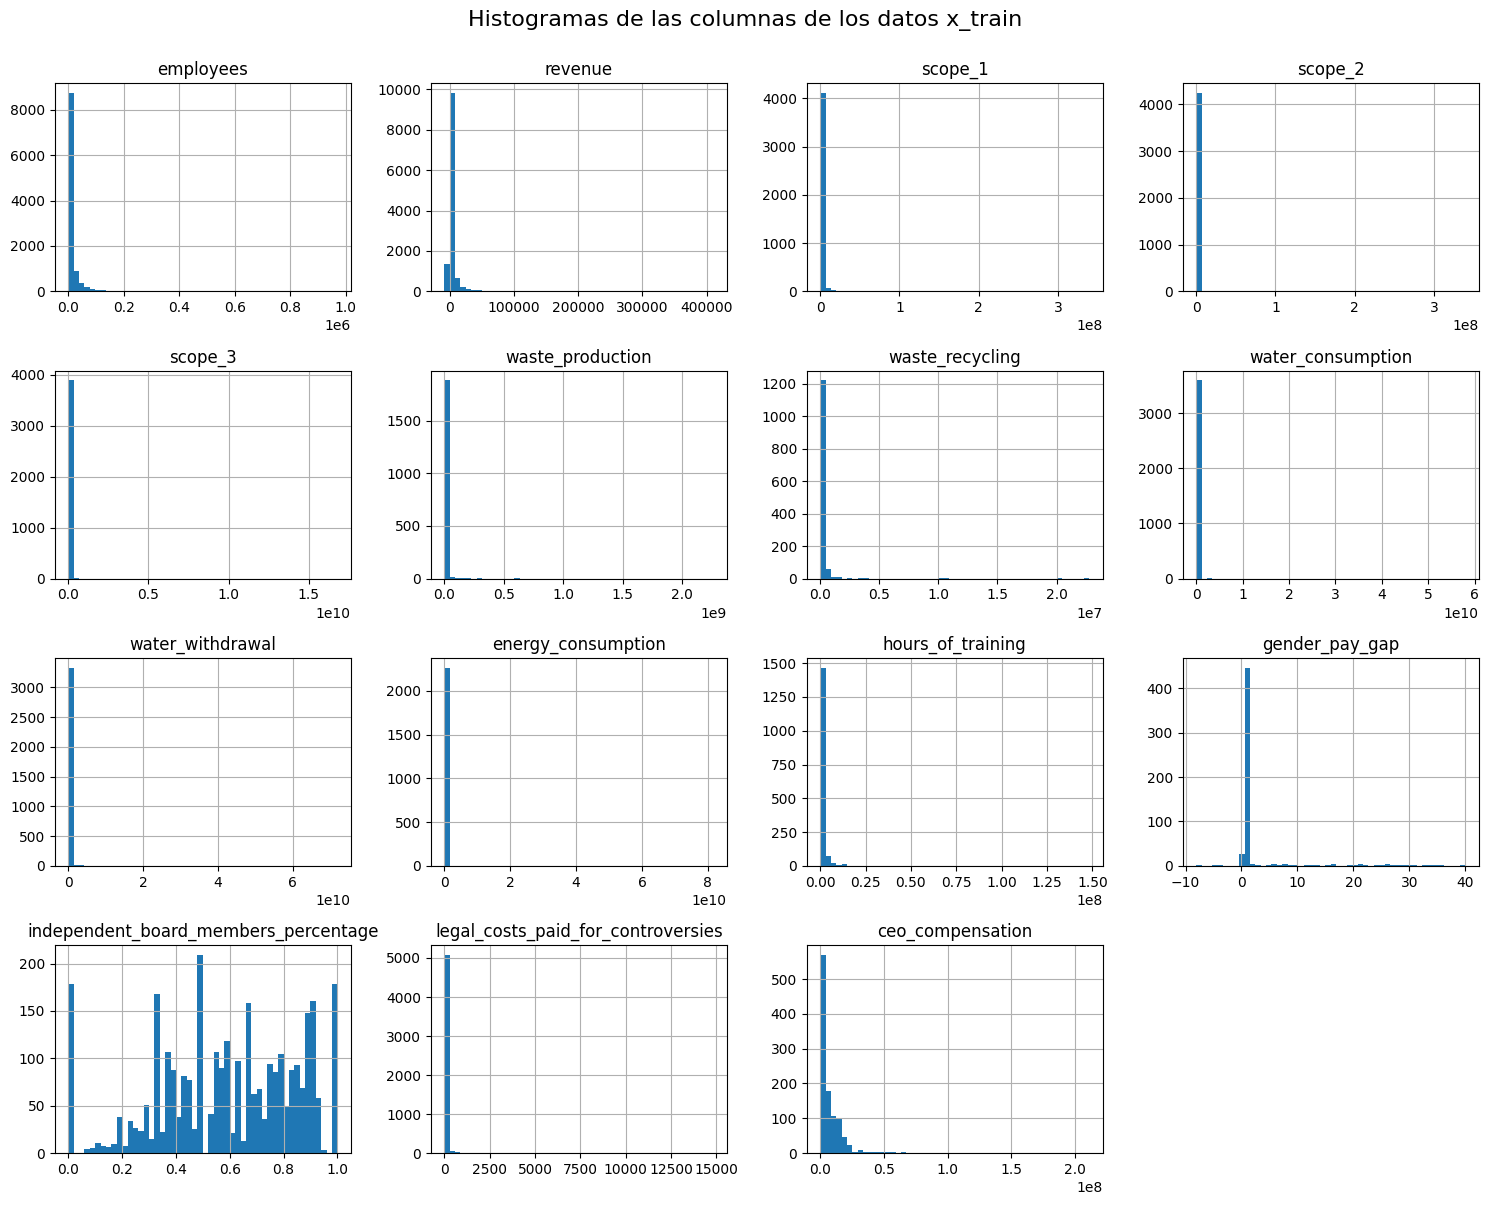

In [26]:
df_x_train[columns].hist(bins=50, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Histogramas de las columnas de los datos x_train", y=1, fontsize=16)
plt.tight_layout()
plt.show()

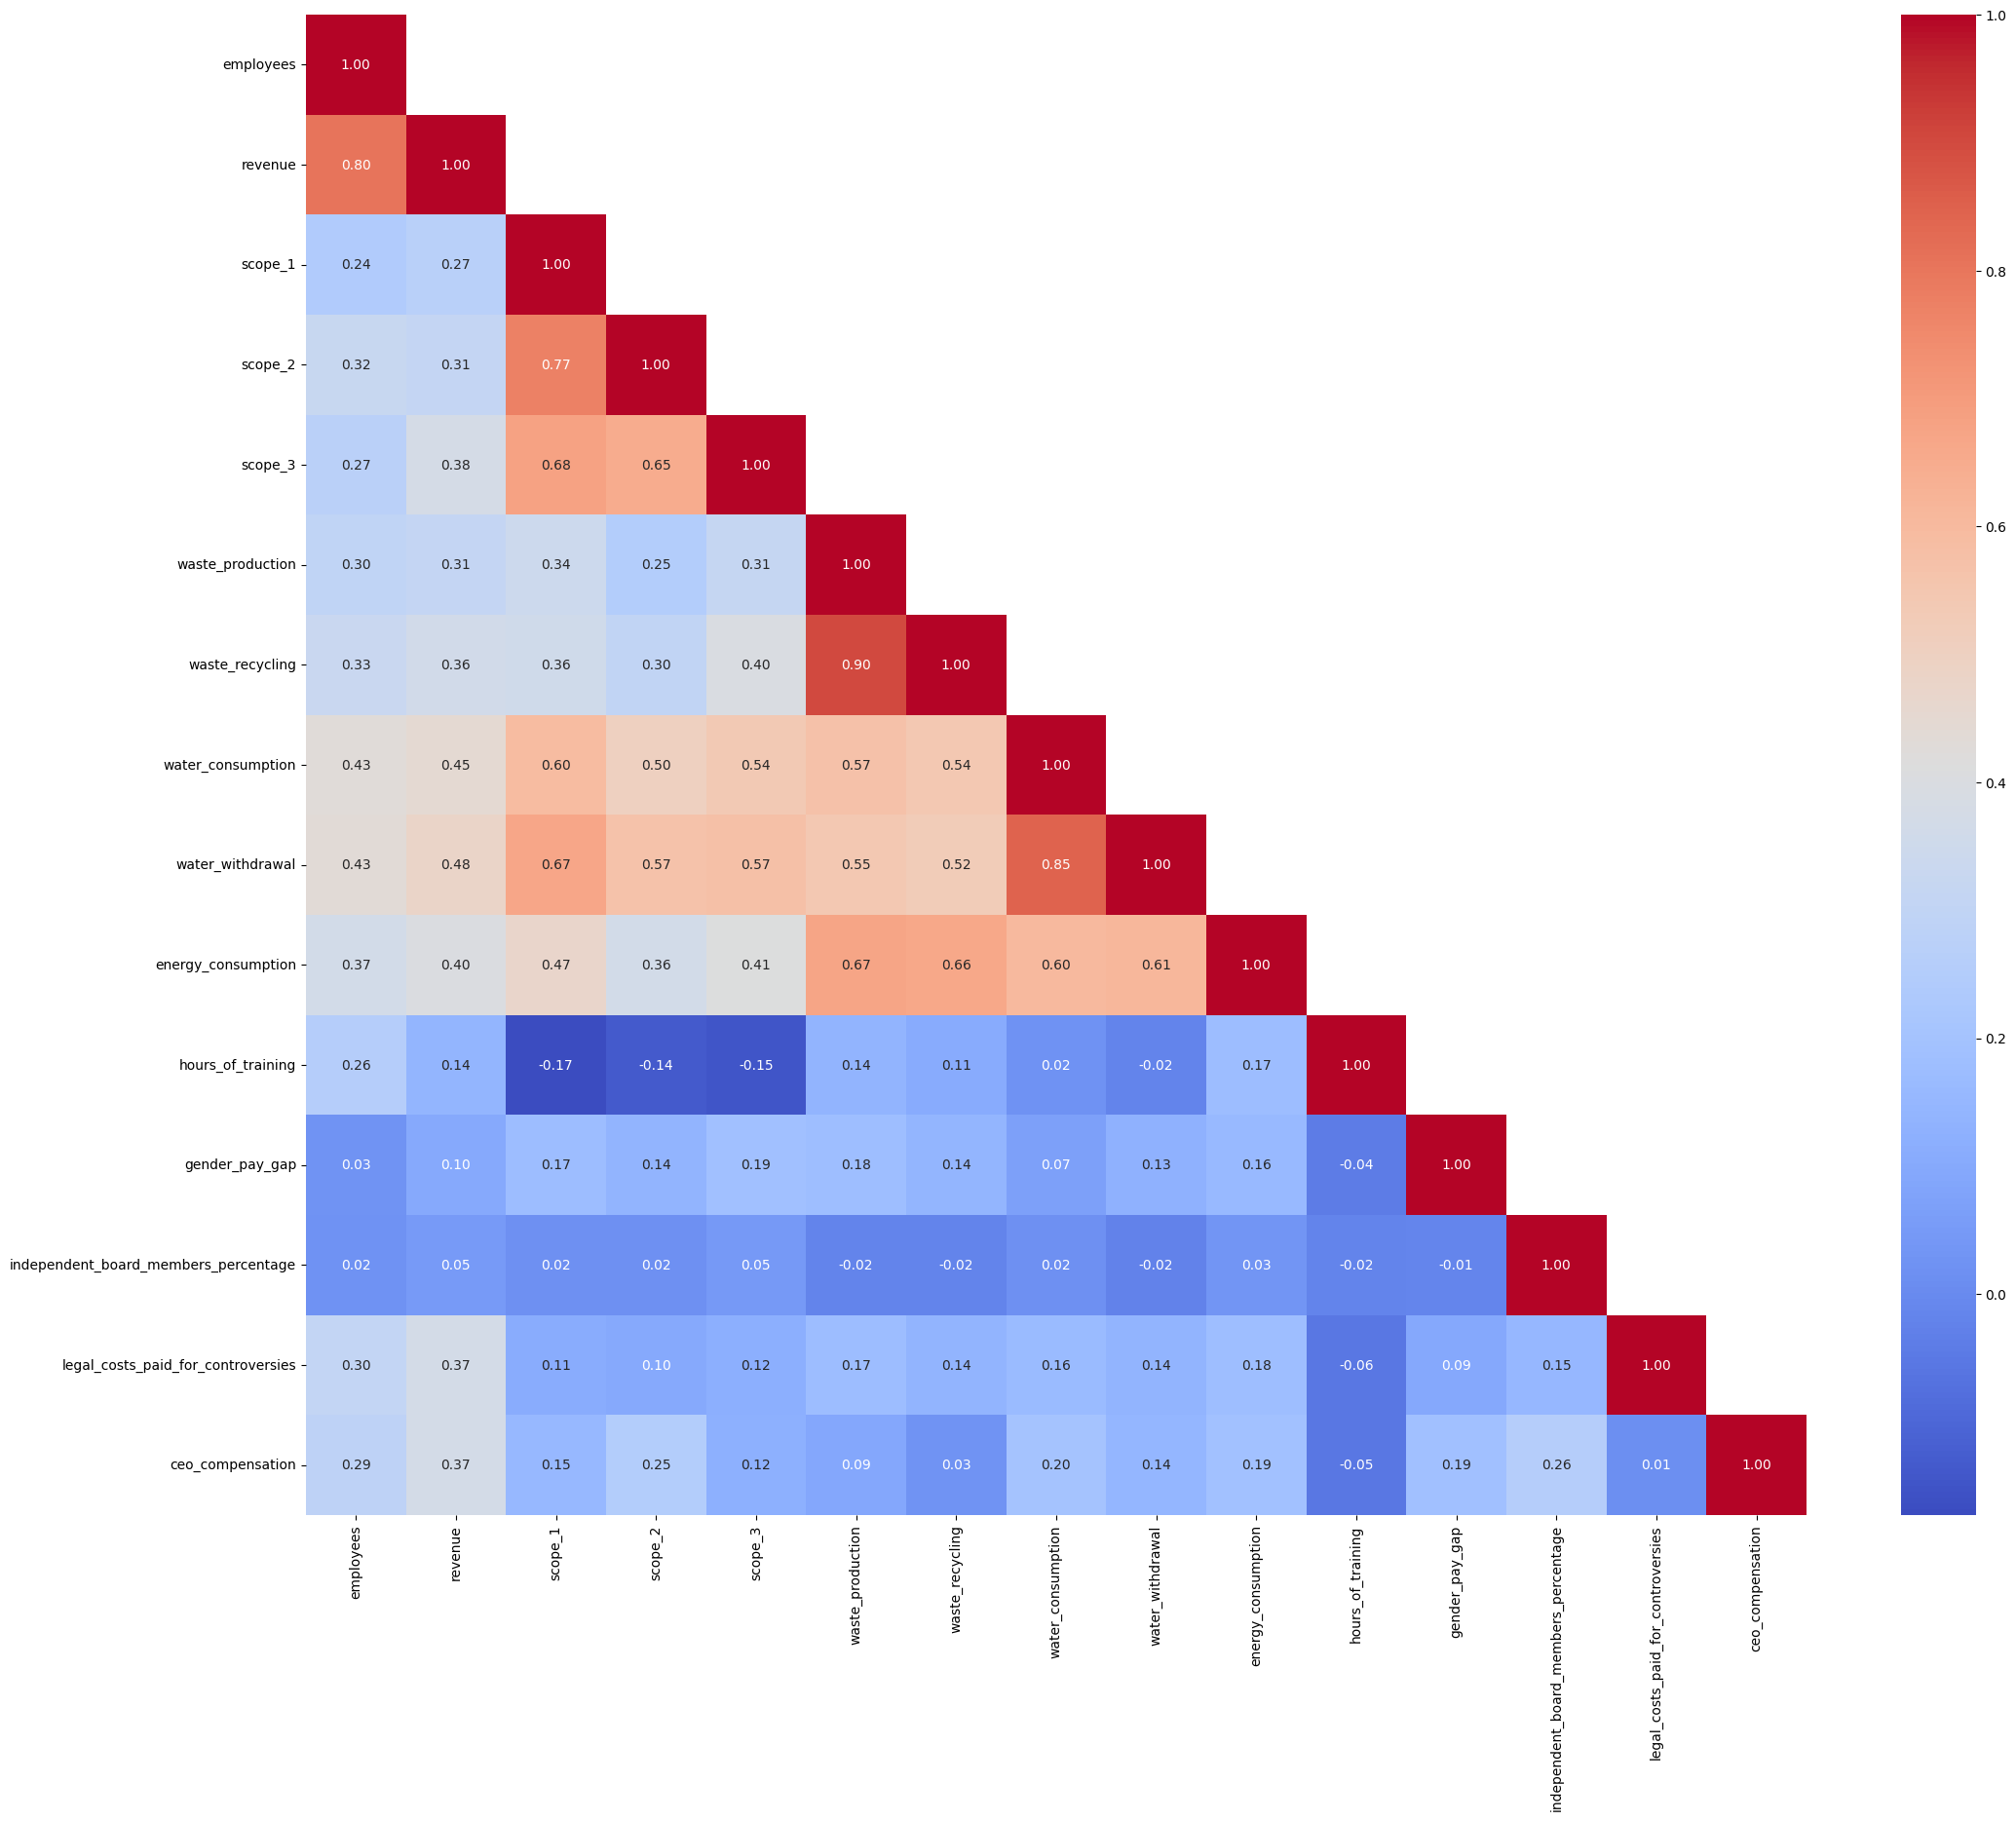

In [27]:
correlation(df_x_train[columns])

Tener en cuenta que la matrix de correlación entre características puede llevarnos a conclusiones erróneas debido a la abultada presencia de valores nulos.

## Preprocesamiento de Datos

In [28]:
columns_to_drop = df_x_train.columns[:7]
columns_to_drop

Index(['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country',
       'industry', 'market_cap'],
      dtype='object')

In [29]:
x_train = df_x_train.drop(columns=columns_to_drop)
y_train = df_y_train.drop(columns=columns_to_drop)

### Imputación de Datos

Vale aquí hacer algunas aclariones:

* Si solamente faltan pocos datos, por ejemplo, menor al 10% podríamos eliminarlos sin perder mucha información y poder entrenar los modelos que veremos a continuación ya que PCA o el gradiente descendente no aceptan valores nulos.

* Si la cantidad de datos faltantes es abundante, ya necesitariamos algun tipo de inputación de datos en funcion de las distribuciones ya existentes de las características. Por ejemplo si la dispersión de una característica es pequeña (es decir muy cercana al promedio) podríamos reemplazar los datos faltantes con el valores cercanos al mismo promedio(una desviación estandar).

* Existe la posibilidad de aproximar las distribuciones de las características a una distribución en particular, como por ejemplo Gaussiana con el promedio y la desviación estandar de los datos existentes. También se podrían utilizar otras distribuciones parametrizadas. En estos casos es recomendable hacer un test estadístico para verificar que la distribución elegida sea consistente con los datos existentes.

* En nuestro caso, usaremos una estrategia de imputación simple: En los lugares donde falten datos se imputará la mediana, aunque pueden elegirse otras estrategias.

* Tener en cuenta que la imputación de datos puede sesgar a los algoritmos (IMPORANTE!)

* Otra cuestión relevante es el tema de los outliers: si el dato por sí solo es un outlier en la realidad no podrá ser captado ni por PCA, ni por el autoencoder, pero si hay algún tipo de relación entre outliers y diferentes características, los outliers tendrían que poder ser detectados por el autoencoder.


In [30]:
# Imputation
imputer = SimpleImputer(strategy="median")  # You can choose a different strategy if needed
x_train_imputed = imputer.fit_transform(x_train)
y_train_imputed = imputer.fit_transform(y_train)

### Outliers

In [31]:
aux = pd.DataFrame(x_train_imputed)
z_scores = zscore(aux)
outlier_counts_per_column = {}

# Count outliers for each column
for column in aux.columns:
    outlier_indices = (abs(z_scores[column]) > 3)
    outlier_count = outlier_indices.sum()
    outlier_counts_per_column[column] = outlier_count

# Display the count of outlier values per column
print("Outliers por columna:")
print(outlier_counts_per_column)


# # Display the values that are considered outliers in each column
# for column in aux.columns:
#     column_outliers = outliers[column].dropna()
#     if not column_outliers.empty:
#         print(f"Outliers in column '{column}': {column_outliers.tolist()}")

Outliers por columna:
{0: 243, 1: 198, 2: 70, 3: 14, 4: 8, 5: 25, 6: 34, 7: 7, 8: 15, 9: 5, 10: 50, 11: 65, 12: 479, 13: 69, 14: 194}


### Escalado

Aunque el escalado no es imprescindible para el ACP, se recomienda encarecidamente en muchos casos. La razón es que el ACP se basa en la matriz de covarianza de las características, y la escala de éstas puede influir significativamente en los resultados.

He aquí algunos puntos clave a tener en cuenta:

* Impacto de la escala de las características: Las características con escalas más grandes contribuirán más a los componentes principales que las características con escalas más pequeñas. Esto puede dar lugar a una representación sesgada de los datos, en la que las variables con escalas mayores dominen los componentes principales.

* Contribución equitativa de las características: El escalado garantiza que todas las características contribuyan por igual a la matriz de varianza-covarianza, lo que permite al ACP centrarse en las direcciones con la varianza más significativa.

* Interpretabilidad de los componentes principales: Cuando las características están en diferentes escalas, los componentes principales pueden ser difíciles de interpretar, ya que las contribuciones de cada característica no son comparables.

* Estabilidad numérica: El escalado puede mejorar la estabilidad numérica del algoritmo PCA, especialmente si hay grandes diferencias en las magnitudes de las características.

Aunque PCA puede aplicarse técnicamente a datos sin escalar, a menudo se recomienda escalar los datos como una buena práctica. La implementación PCA de Scikit-learn (sklearn.decomposition.PCA) centra automáticamente los datos (restando la media) durante el proceso de ajuste, pero depende del usuario decidir si escalar adicionalmente las características.

Otro detalle importante es ver cuantos **valores negativos** hay en la tabla:

In [32]:
(x_train < 0).sum()

employees                                0
revenue                                 19
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

In [33]:
(pd.DataFrame(x_train_imputed)<0).sum() 

0      0
1     19
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     5
12     0
13     0
14     0
dtype: int64

No se imputan datos negativos demás, pero no deseamos que esos pocos valores negativos hagan un data leak sobre las demas columnas y obtengamos datos sin sentido, por lo tanto, escalaremos los datos entre 0 y 1 con la clase MinMaxScaler

In [34]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [35]:
x_train_scaled = std_scaler.fit_transform(x_train_imputed)
x_train_minmax = minmax_scaler.fit_transform(x_train_scaled)

## Análisis de componentes principales

In [36]:
pca = PCA()
pca.fit_transform(x_train_minmax)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

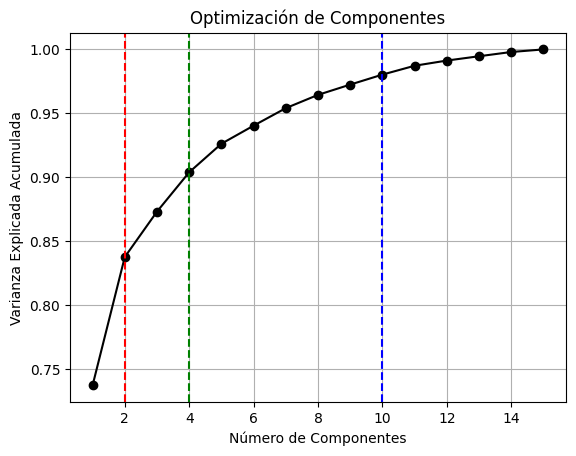

In [37]:
# Plot the cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    color="black",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Optimización de Componentes")
plt.grid(True)

# Add vertical dashed lines
plt.axvline(x=2, color="r", linestyle="--", label="Line at 2")
plt.axvline(x=4, color="g", linestyle="--", label="Line at 3")
plt.axvline(x=10, color="b", linestyle="--", label="Line at 4")
plt.show()

Podemos apreciar tres puntos importantes en este gráfico:

* Con **2** componentes principales explicamos casi el 85% de la varianza

* Con **4** componentes principales explicamos mas del 90% de la Varianza

* Con **10** componentes principales explicamos cerca del 97% de la Varianza

### Procedimiento

In [38]:
# Choose the optimal number of components based on the plot
optimal_components = 2

In [39]:
pca = PCA(n_components=optimal_components) #Apply PCA with the optimal number of components
x_train_pca_values = pca.fit_transform(x_train_minmax)

In [40]:
x_train_pca = pca.inverse_transform(x_train_pca_values) #PCA inversion

In [41]:
x_train_pca = minmax_scaler.inverse_transform(x_train_pca) #MinMax Scaling inversion

In [42]:
x_train_pca = std_scaler.inverse_transform(x_train_pca) #Std Scaling inversion

In [43]:
x_train_pca= pd.DataFrame(x_train_pca, columns=x_train.columns)

In [44]:
x_train_fill_pca = x_train.fillna(x_train_pca)

Hacemos lo mismo para el archivo y_train, para después poder comparar la métrica:

In [45]:
y_train_imputed = imputer.fit_transform(y_train) # Median imputing
y_train_scaled = std_scaler.fit_transform(y_train_imputed) # MinMax Scaling
y_train_minmax = minmax_scaler.fit_transform(y_train_scaled) # Standard Scaling
y_train_pca_values = pca.transform(y_train_minmax) # Apply trained PCA
y_train_pca = pca.inverse_transform(y_train_pca_values)
y_train_pca = minmax_scaler.inverse_transform(y_train_pca) 
y_train_pca = std_scaler.inverse_transform(y_train_pca)
y_train_pca = pd.DataFrame(y_train_pca, columns=y_train.columns)
y_train_fill_pca = y_train.fillna(y_train_pca)

In [46]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:

    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_fill_pca, x_train_fill_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final = np.mean(nrmse_values_pca)

In [47]:
print(f'Final NRMSE Score in training: {score_final}')

Final NRMSE Score in training: 0.0019205121233074047


In [48]:
(x_train_fill_pca<0).sum()

employees                                  0
revenue                                  206
scope_1                                 3059
scope_2                                 5017
scope_3                                  389
waste_production                        3541
waste_recycling                            0
water_consumption                        537
water_withdrawal                         343
energy_consumption                       581
hours_of_training                          0
gender_pay_gap                             5
independent_board_members_percentage       0
legal_costs_paid_for_controversies       137
ceo_compensation                           0
dtype: int64

### Testing

In [49]:
df_x_test = pd.read_csv("./Data/x_test.csv")

In [50]:
x_test = df_x_test.drop(columns="Unnamed: 0")

In [51]:
x_test = x_test.drop(columns=columns_to_drop)

In [52]:
x_test_imputed = imputer.fit_transform(x_test)
x_test_scaled = std_scaler.fit_transform(x_test_imputed)
x_test_minmax = minmax_scaler.fit_transform(x_test_scaled)
x_test_pca_values = pca.transform(x_test_scaled)
x_test_pca = pca.inverse_transform(x_test_pca_values)
x_test_pca = std_scaler.inverse_transform(x_test_pca)
x_test_pca = minmax_scaler.inverse_transform(x_test_pca)
x_test_pca_imputed = pd.DataFrame(x_test_pca, columns=x_test.columns)
x_test_filled_pca = x_test.fillna(x_test_pca_imputed)

In [53]:
y_test_pca = pd.concat([df_x_test[['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country', 'industry']], x_test_filled_pca], axis=1)

In [54]:
y_test_pca.to_csv('./Data/y_test_pca.csv', index=True)

![PCA Submission](./Images/PCA_submission.png)

In [55]:
(x_train_pca<0).sum()

employees                                  1
revenue                                 2257
scope_1                                 3942
scope_2                                 6246
scope_3                                  808
waste_production                        3776
waste_recycling                            0
water_consumption                        998
water_withdrawal                         553
energy_consumption                      1174
hours_of_training                          0
gender_pay_gap                             0
independent_board_members_percentage       4
legal_costs_paid_for_controversies       260
ceo_compensation                           0
dtype: int64

## Arquitectura Autoencoder

Aunque el aprendizaje profundo ha recibido mucha atención y se ha aplicado a varios problemas de inteligencia artificial en los últimos años, su investigación con fines de imputación sigue siendo un tema poco estudiado. 

Entre los enfoques de aprendizaje profundo para imputación, el Autoencoder (AE) y sus variantes (p. ej. Denoising y Variational) han llamado la atención de la comunidad investigadora debido a sus propiedades en lo que se refiere a la capacidad de de aprender a partir de datos corruptos, lo que constituye una extensión natural al campo de los datos ausentes (Nelwamondo et al., 2007; S'anchez-Morales et al., 2019; Costa et al., 2018; Gondara y Wang, 2018). 

Este tipo de redes neuronales aprenden una representación de los datos a partir de la capa de entrada e intenta reproducirla en la capa de salida. Al hacer esto, el modelo es capaz de aprender a partir de datos incompletos y generar nuevos valores plausibles para la imputación.

In [56]:
BATCH_SIZE = 128 # Adjust this value based on your GPU memory, always use powers of 2, i.e. 2, 4, 8, 16...

In [57]:
# Convert DataFrame to PyTorch tensor
x_train_minmax = minmax_scaler.fit_transform(x_train_imputed)
x_train_tensor = torch.tensor(x_train_minmax, dtype=torch.float32)
y_train_minmax = minmax_scaler.fit_transform(x_train_imputed)
y_train_tensor = torch.tensor(y_train_minmax, dtype=torch.float32)

# Define the ratio for splitting between training and validation sets
validation_ratio = 0.1

# Calculate the size of the validation set
validation_size = int(validation_ratio * len(x_train_tensor))
training_size = len(x_train_tensor) - validation_size

# Use random_split to create training and validation datasets
train_dataset, val_dataset = random_split(
    dataset=TensorDataset(x_train_tensor),
    lengths=[training_size, validation_size]
)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [58]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [59]:
# Set input and hidden size based on your data
input_size = x_train_scaled.shape[1]
hidden_size = input_size // 4

In [60]:
# Instantiate the model
model = Autoencoder(input_size, hidden_size)
dev = "cuda" if device == "cuda:0" else "cpu"
summary(model.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 3]              48
            Linear-2                  [128, 15]              60
Total params: 108
Trainable params: 108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [61]:
def train_eval(model, loader, optimizer, loss_func):
    total_loss_train = []
    total_loss_val = []

    # Model in training mode:
    if model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Train", total=len(loader)
        ):
            optimizer.zero_grad(set_to_none=True)

            # Forward pass
            input_data = data[0].to(device)
            output = model(input_data)
            loss_train = loss_func(output, input_data)

            # Check for NaN in loss
            if np.isnan(loss_train.item()):
                print("NaN loss value detected. Aborting training.")
                break

            # Backward pass and optimization
            loss_train.backward()
            optimizer.step()
            total_loss_train.append(loss_train.item())

        return total_loss_train

    #Model in evaluation mode:
    elif not model.training:
        for batch_idx, data  in tqdm(enumerate(loader), desc='Epoch_Val', total=len(loader)):
            input_data = data[0].to(device)
            outputs = model(input_data)
            loss_val = loss_func(outputs, input_data)
            total_loss_val.append(loss_val.item())
        return total_loss_val


def calc_loss(loss_list, total_loss):
    loss_list.append(sum(total_loss) / len(total_loss))
    return loss_list

In [62]:
# Hiperparámetros
EPOCHS = 100
LR = 0.0001

In [63]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)
#optimizer = optim.Adam(model.parameters(), lr=LR, amsgrad=True, weight_decay=0.1 * LR)  # pueden agregar más atributos al optimizador como amsgrad=True, weight_decay=0.1*LR, ...

In [64]:
# Reset model parameters
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

reset_model_parameters(model)

In [65]:
%%time

torch.cuda.empty_cache()

# Lists
loss_list_train = []
loss_list_val = []

# Training and Evaluation
for epoch in range(EPOCHS):
    # Train Iterations
    model = model.train()
    total_loss_train = train_eval(model, train_loader, optimizer, loss)

    # Val Iterations
    model = model.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model, val_loader, optimizer, loss)

    # Calc Loss
    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)

    # Printing Metrics per Epoch
    print(f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n")

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.1243  Val Loss:0.1183



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.1125  Val Loss:0.1072



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.1020  Val Loss:0.0974



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.0927  Val Loss:0.0885



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.0842  Val Loss:0.0804



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.0766  Val Loss:0.0731



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.0695  Val Loss:0.0663



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.0630  Val Loss:0.0600



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.0570  Val Loss:0.0543



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.0515  Val Loss:0.0489



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.0463  Val Loss:0.0440



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.0416  Val Loss:0.0394



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.0373  Val Loss:0.0353



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.0333  Val Loss:0.0315



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.0297  Val Loss:0.0281



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.0264  Val Loss:0.0250



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.0235  Val Loss:0.0222



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.0208  Val Loss:0.0197



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.0185  Val Loss:0.0174



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.0163  Val Loss:0.0154



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.0144  Val Loss:0.0136



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.0127  Val Loss:0.0119



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.0112  Val Loss:0.0105



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.0099  Val Loss:0.0092



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.0087  Val Loss:0.0081



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.0076  Val Loss:0.0071



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.0067  Val Loss:0.0063



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.0059  Val Loss:0.0055



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.0052  Val Loss:0.0049



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.0046  Val Loss:0.0043



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0041  Val Loss:0.0038



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0036  Val Loss:0.0034



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0032  Val Loss:0.0030



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0029  Val Loss:0.0027



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0026  Val Loss:0.0024



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0023  Val Loss:0.0022



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0021  Val Loss:0.0020



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0019  Val Loss:0.0018



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0018  Val Loss:0.0017



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0016  Val Loss:0.0015



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0015  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0014  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0012  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0004  Val Loss:0.0004

CPU times: user 22.5 s, sys: 441 ms, total: 22.9 s
Wall time: 23.1 s


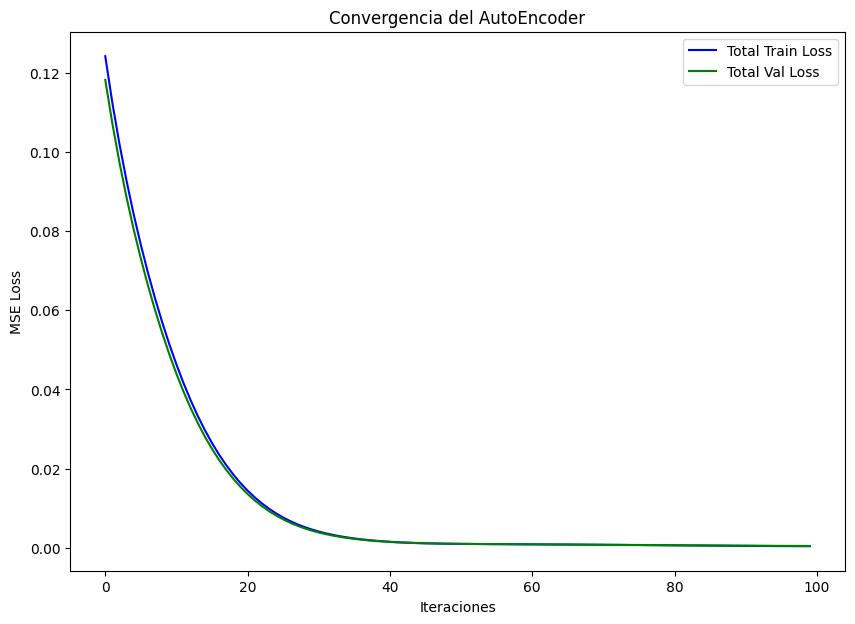

In [66]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [67]:
# Use the trained Autoencoder to fill missing values
model.eval()
with torch.no_grad():
    filled_data = model(x_train_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())

x_train_ae = pd.DataFrame(filled_data, columns=x_train.columns)
x_train_filled_ae = x_train.fillna(x_train_ae)

In [68]:
model.eval()
with torch.no_grad():
    filled_data = model(y_train_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())

y_train_ae = pd.DataFrame(filled_data, columns=y_train.columns)
y_train_filled_ae = y_train.fillna(y_train_ae)

In [69]:
nrmse_values_ae = []

for column in y_train.columns:
    mrmse_col = normalized_mrse(y_train_filled_ae[column], x_train_filled_ae[column])
    nrmse_values_ae.append(nrmse_col)

score_final = np.mean(nrmse_values_ae)

In [70]:
print(f'Final NRMSE Score in training: {score_final}')

Final NRMSE Score in training: 0.0019205121233074047


## Testing

In [71]:
# Convert DataFrame to PyTorch tensor
x_test_minmax = minmax_scaler.transform(x_test_imputed)
x_test_tensor = torch.tensor(x_test_minmax, dtype=torch.float32)

In [72]:
# Use the trained Autoencoder to fill missing values
model.eval()
with torch.no_grad():
    filled_data = model(x_test_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())
x_test_ae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_ae = x_test.fillna(x_test_ae)
x_test_filled_ae = pd.concat([df_x_test[['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country', 'industry']], x_test_ae], axis=1)

In [73]:
x_test_filled_ae.to_csv('./Data/y_test_ae.csv', index=True)

In [74]:
(x_train_ae < 0).sum()

employees                                 572
revenue                                  1015
scope_1                                  5782
scope_2                                 11308
scope_3                                 12213
waste_production                         1960
waste_recycling                          1181
water_consumption                       10982
water_withdrawal                         2451
energy_consumption                      11971
hours_of_training                        1257
gender_pay_gap                             42
independent_board_members_percentage        1
legal_costs_paid_for_controversies       1162
ceo_compensation                           54
dtype: int64

### Non Linear Autoencoder

In [75]:
# Define the Autoencoder model
class Non_Linear_Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Non_Linear_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [76]:
hidden_size = input_size // 4

In [77]:
EPOCHS = 100
LR = 0.0001

In [78]:
model = Non_Linear_Autoencoder(input_size, hidden_size)
summary(model.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 3]              48
              ReLU-2                   [128, 3]               0
            Linear-3                  [128, 15]              60
              ReLU-4                  [128, 15]               0
Total params: 108
Trainable params: 108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [79]:
reset_model_parameters(model)

In [80]:
optimizer = optim.Adam(model.parameters(), lr=LR)
#optimizer = optim.Adam(model.parameters(), lr=LR, amsgrad=True, weight_decay=0.1 * LR)

In [81]:
%%time

torch.cuda.empty_cache()

# Lists
loss_list_train = []
loss_list_val = []

# Training and Evaluation
for epoch in range(EPOCHS):
    # Train Iterations
    model = model.train()
    total_loss_train = train_eval(model, train_loader, optimizer, loss)
    # Val Iterations
    model = model.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model, val_loader, optimizer, loss)

    # Train Calc Loss
    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    # Val Calc Loss
    loss_list_val = calc_loss(loss_list_val, total_loss_val)
    # Printing Metrics per Epoch
    print(f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n")

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.0667  Val Loss:0.0654



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.0637  Val Loss:0.0623



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.0605  Val Loss:0.0592



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.0574  Val Loss:0.0561



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.0544  Val Loss:0.0530



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.0514  Val Loss:0.0502



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.0487  Val Loss:0.0475



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.0460  Val Loss:0.0448



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.0434  Val Loss:0.0423



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.0409  Val Loss:0.0399



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.0385  Val Loss:0.0375



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.0363  Val Loss:0.0354



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.0343  Val Loss:0.0336



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.0326  Val Loss:0.0320



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.0312  Val Loss:0.0307



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.0300  Val Loss:0.0296



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.0290  Val Loss:0.0288



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.0282  Val Loss:0.0281



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.0276  Val Loss:0.0275



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.0271  Val Loss:0.0271



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.0268  Val Loss:0.0268



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.0265  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.0263  Val Loss:0.0264



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.0261  Val Loss:0.0262



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.0260  Val Loss:0.0261



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.0259  Val Loss:0.0261



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.0259  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0258  Val Loss:0.0260



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0258  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0257  Val Loss:0.0259



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0257  Val Loss:0.0259

CPU times: user 27 s, sys: 440 ms, total: 27.4 s
Wall time: 27.5 s


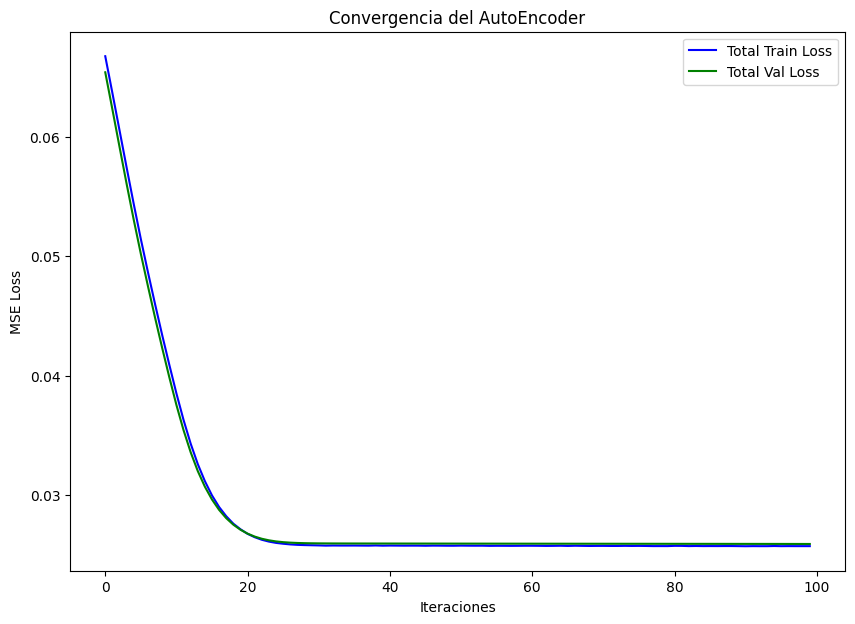

In [82]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [83]:
model.eval()
with torch.no_grad():
    filled_data = model(x_train_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())
x_train_nlae = pd.DataFrame(filled_data, columns=x_train.columns)
x_train_filled_nlae = x_train.fillna(x_train_nlae)

In [84]:
model.eval()
with torch.no_grad():
    filled_data = model(y_train_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())
y_train_nlae = pd.DataFrame(filled_data, columns=y_train.columns)
y_train_filled_nlae = y_train.fillna(y_train_nlae)

In [85]:
nrmse_values_nlae = []

for column in y_train.columns:
    nrmse_col = normalized_mrse(y_train_filled_nlae[column], x_train_filled_nlae[column])
    nrmse_values_nlae.append(nrmse_col)

score_final = np.mean(nrmse_values_nlae)

In [86]:
print(f'Final NRMSE Score in training: {score_final}')

Final NRMSE Score in training: 0.015090037608603961


In [87]:
# Testing
model.eval()
with torch.no_grad():
    filled_data = model(x_test_tensor.to(device))

filled_data = minmax_scaler.inverse_transform(filled_data.cpu().numpy())
x_test_nlae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_nlae = x_test.fillna(x_test_nlae)
x_test_filled_nlae = pd.concat([df_x_test[['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country', 'industry']], x_test_ae], axis=1)

In [88]:
x_test_filled_nlae.to_csv('./Data/y_test_nae.csv', index=True)

Score from webpage: 0.40307506669297105

In [89]:
(x_train_nlae<0).sum()

employees                                 0
revenue                                 484
scope_1                                   0
scope_2                                   0
scope_3                                   0
waste_production                          0
waste_recycling                           0
water_consumption                         0
water_withdrawal                          0
energy_consumption                        0
hours_of_training                         0
gender_pay_gap                            6
independent_board_members_percentage      0
legal_costs_paid_for_controversies        0
ceo_compensation                          0
dtype: int64

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)